Finding topics in the very large corpus of PubMed abstracts is a time-consuming process. A reasonable workaround to speed topic modeling is to find topics using a fraction of the original dataset. We then only transform all the rest of data to this fitted topic space.

Here, we explore some properties of the corpus to figure our a reasonable fraction for topic modeling. Since topics are based on words and phrases, some interesting features could be vocabulary size, number of phrases, number of words, etc.

In the following code we measure those features on different fractions of the data.

In [1]:
!pip install tomotopy tqdm pandas numpy -Uq

import tomotopy as tp
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
PUBMED = pd.read_csv('data/pubmed/abstracts_preprocessed.csv.gz')

results = []

for fraction in tqdm(np.linspace(0,1,11)):
    pubmed_sample = PUBMED.groupby('subcategory').apply(
        lambda grp: grp.sample(n=max(int(len(grp) * fraction), 1))
    )

    docs = pubmed_sample['abstract'].dropna().to_list()
    corpus = tp.utils.Corpus(tokenizer=tp.utils.SimpleTokenizer())
    corpus.process(docs)

    ngrams = []
    # ngrams = corpus.extract_ngrams(min_cf=20, min_df=10, max_len=5, max_cand=1000, normalized=True)
    # corpus.concat_ngrams(ngrams, delimiter='_')

    model = tp.LDAModel(k=30, min_df=10, corpus=corpus)
    model.train(0)
    print(f'data_fraction: {fraction:.1f},\t '
          f'n_docs={len(model.docs)},\t '
          f'n_vocabs={len(model.vocabs)},\t '
          f'n_used_vocabs={len(model.used_vocabs)},\t '
          f'n_words={model.num_words},\t '
          f'n_ngrams={len(ngrams)}')
    results.append((fraction, len(model.docs), len(model.vocabs), len(model.used_vocabs), model.num_words, len(ngrams)))


  9%|▉         | 1/11 [00:00<00:01,  6.18it/s]

data_fraction: 0.0,	 n_docs=170,	 n_vocabs=3429,	 n_used_vocabs=293,	 n_words=10659,	 n_ngrams=0


 18%|█▊        | 2/11 [00:04<00:22,  2.50s/it]

data_fraction: 0.1,	 n_docs=32266,	 n_vocabs=44699,	 n_used_vocabs=10048,	 n_words=3907205,	 n_ngrams=0


 27%|██▋       | 3/11 [00:13<00:44,  5.51s/it]

data_fraction: 0.2,	 n_docs=64578,	 n_vocabs=60491,	 n_used_vocabs=13773,	 n_words=7898691,	 n_ngrams=0


 36%|███▋      | 4/11 [00:28<01:03,  9.11s/it]

data_fraction: 0.3,	 n_docs=96880,	 n_vocabs=71451,	 n_used_vocabs=16648,	 n_words=11934893,	 n_ngrams=0


 45%|████▌     | 5/11 [00:46<01:15, 12.63s/it]

data_fraction: 0.4,	 n_docs=129197,	 n_vocabs=80506,	 n_used_vocabs=19002,	 n_words=15932986,	 n_ngrams=0


 55%|█████▍    | 6/11 [01:11<01:22, 16.56s/it]

data_fraction: 0.5,	 n_docs=161538,	 n_vocabs=88333,	 n_used_vocabs=21063,	 n_words=19965889,	 n_ngrams=0


 64%|██████▎   | 7/11 [01:39<01:21, 20.36s/it]

data_fraction: 0.6,	 n_docs=193824,	 n_vocabs=94932,	 n_used_vocabs=22901,	 n_words=23976688,	 n_ngrams=0


 73%|███████▎  | 8/11 [02:12<01:13, 24.43s/it]

data_fraction: 0.7,	 n_docs=226125,	 n_vocabs=100965,	 n_used_vocabs=24513,	 n_words=28001143,	 n_ngrams=0


 82%|████████▏ | 9/11 [02:50<00:57, 28.85s/it]

data_fraction: 0.8,	 n_docs=258450,	 n_vocabs=106345,	 n_used_vocabs=26134,	 n_words=32040813,	 n_ngrams=0


 91%|█████████ | 10/11 [03:36<00:33, 33.87s/it]

data_fraction: 0.9,	 n_docs=290752,	 n_vocabs=111386,	 n_used_vocabs=27517,	 n_words=36081182,	 n_ngrams=0


100%|██████████| 11/11 [04:28<00:00, 24.45s/it]

data_fraction: 1.0,	 n_docs=323149,	 n_vocabs=115836,	 n_used_vocabs=28900,	 n_words=40112200,	 n_ngrams=0


<AxesSubplot:xlabel='sample_fraction', ylabel='used_vocab_size'>

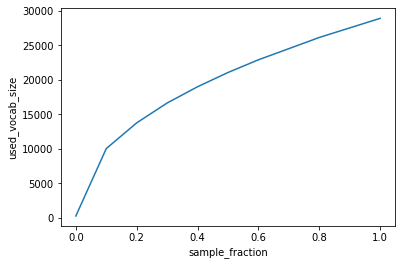

In [5]:
result_df = pd.DataFrame(results, columns=['sample_fraction','n_docs','vocab_size', 'used_vocab_size','n_words', 'n_ngrams'])

import seaborn as sns

# result_df['vocab_ratio'] = result_df['vocab_size'] / 115836 #result_df['n_words']

sns.lineplot(data=result_df, x='sample_fraction', y='used_vocab_size')
# sns.lineplot(data=result_df, x='sample_fraction', y='n_words')